### Steps
#### 1- Import necessary libraries.
#### 2- Read the dataset using Pandas.
#### 3- Explore, assess, and clean the data.
#### 4- Visualize the relationship between different variables and draw insights.

#### 1- Import necessary libraries

In [1]:
#To read the dataset
import pandas as pd 

#To display all columns and rows
pd.get_option("display.max_columns")
pd.set_option('display.max_rows', None)

#To hide warning messages
import warnings
warnings.filterwarnings('ignore')


#For visualization in Jupyter Notebook
import matplotlib.pyplot as plt

#### 2- Read the dataset using Pandas

In [2]:
#Let's call the dataset "laptop_df" and display the first 5 records from it.
laptop_df= pd.read_csv('laptop.csv')
laptop_df.head(5)

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [3]:
#Display the last 5 records
laptop_df.tail(5)

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
125,125,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
126,126,HP,15q,NaN,i3,7th,4.0,1 TB HDD,DOS,4.2,32905
127,127,Lenovo,v15,NaN,i3,10th,4.0,1 TB HDD,DOS,3.1,39949
128,128,ASUS,Vivobook,15,i3,11th,8.0,1 TB HDD,Windows 10 Home,2.9,42750
129,129,Lenovo,IdeaPad,3,i3,11th,8.0,256 GB SSD,Windows 11 Home,4.3,39940


#### 3- Explore, assess, and clean the data.

#### I- Explore the data

In [4]:
# Use the "shape" function to display the number of rows and columns in our dataset.
laptop_df.shape

(130, 11)

#### The dataset has 130 records and 11 columns representing 11 different features.

In [5]:
#The "info" method prints different properties of the dataset including:columns names, number of columns, data type of each column...etc
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          130 non-null    int64  
 1   Brand               130 non-null    object 
 2   Model               116 non-null    object 
 3   Series              80 non-null     object 
 4   Processor           123 non-null    object 
 5   Processor_Gen       123 non-null    object 
 6   RAM                 122 non-null    float64
 7   Hard_Disk_Capacity  122 non-null    object 
 8   OS                  122 non-null    object 
 9   Rating              130 non-null    float64
 10  Price               130 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 11.3+ KB


#### The above results show the following:
#### - There are 10 different laptop features distributed across 130 records in the dataset.
#### - Values in RAM & Operating system are float (decimal numbers), Price values are in integer form, and the other features are in string format which is referred to as "object".

In [6]:
#The describe function shows us the statistical properties of our dataset.
laptop_df.describe(include= ['float','object','int'])

,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating
count,130,116,80,123,123,122.000000,122,122,130.000000
unique,9,33,28,17,10,NaN,7,7,NaN
top,DELL,Inspiron,3,i3,11th,NaN,512 GB SSD,Windows 10 Home,NaN
freq,40,26,17,58,69,NaN,50,46,NaN
mean,NaN,NaN,NaN,NaN,NaN,8.622951,NaN,NaN,4.185385
std,NaN,NaN,NaN,NaN,NaN,3.253296,NaN,NaN,0.364960
min,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,2.900000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,4.100000
50%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,4.300000
75%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,4.400000


#### - The count refers to the number (count) of records.
#### - Unique is the number of unique values in each column.
#### - Top is the most common value in each column.
#### - Freq is the frequency of the most common value (frequency of top).
#### - Mean is the average of all values in columns with int or float data type.
#### - std is the standard deviation which is a measure of spread that represents the degree to which the values are spread. The higher the number, the more spread the values are.
#### - Min is the minimum value in each column.
#### - Max is the maximum value in each column.
#### - 25% is the 25% percentile and it is the value under which 25% of the data points exist.
#### - 50% is the 50% percentile also known as the (median) under which 50% of the data points exist.
#### - 75% is the 75% percentile under which 75% of the data points exist. 

In [7]:
#The correlation function is used to find the correlation between different features.
laptop_df.corr()

,Unnamed: 0,RAM,Rating,Price
Unnamed: 0,1.000000,0.000611,-0.247042,0.169254
RAM,0.000611,1.000000,0.240383,0.685747
Rating,-0.247042,0.240383,1.000000,0.442159
Price,0.169254,0.685747,0.442159,1.000000


#### The closer to one, the higher the correlation. From the above results, we can notice that the RAM and price are positively correlated (0.68), meaning that the higher the RAM, the higher the price which actually makes sense because higher RAMs are associated with higher performance. On the other hand, RAM and rating are weakly correlated (0.24) which signifies correlation but a weak one. 

In [8]:
#Here, the value_counts() method displays the count of each distinct value in every column.
laptop_df.Brand.value_counts()

DELL         40
ASUS         29
Lenovo       28
HP           17
APPLE         7
acer          4
MSI           3
realme        1
MICROSOFT     1
Name: Brand, dtype: int64

In [9]:
laptop_df.Model.value_counts()

Inspiron      26
IdeaPad       15
VivoBook      11
Vostro        10
Vivobook       6
Ideapad        6
Ryzen          5
2020           4
Pavilion       3
MacBook        3
HP             2
ROG            2
Chromebook     2
TUF            2
ZenBook        1
ASUS           1
Book           1
Notebook       1
Katana         1
15q            1
Surface        1
GF63           1
3000           1
Thinkpad       1
250-G6         1
Nitro          1
APU            1
Aspire         1
v15            1
IDEAPAD        1
Swift          1
Travelmate     1
Envy           1
Name: Model, dtype: int64

In [10]:
laptop_df.Series.value_counts()

3           17
15           8
Gaming       7
Ryzen        7
Macbook      4
14           4
Slim         4
5            3
Air          3
K15          3
Celeron      2
Pavilion     2
Zephyrus     1
7            1
Ultra        1
Laptop       1
530s         1
(Slim)       1
Strix        1
Dual         1
Duo          1
Flex         1
TUF          1
PC           1
Thin         1
3405         1
GF66         1
Athlon       1
Name: Series, dtype: int64

In [11]:
laptop_df.Processor.value_counts()

i3          58
i5          36
-            5
i7           4
5600H        3
3250U        3
3450U        3
5500U        2
4600H        1
4800H        1
A9           1
4800HS       1
3050U        1
5300U        1
AMD          1
R3-3250U     1
5600U        1
Name: Processor, dtype: int64

In [12]:
laptop_df.Processor_Gen.value_counts()

11th      69
10th      24
-         17
8th        3
(4         3
7th        2
(8         2
Ryzen™     1
A99425     1
3rd        1
Name: Processor_Gen, dtype: int64

In [13]:
laptop_df.RAM.value_counts()

8.0     90
16.0    17
4.0     15
Name: RAM, dtype: int64

In [14]:
laptop_df.Hard_Disk_Capacity.value_counts()

512 GB SSD            50
1 TB HDD              43
256 GB SSD            25
64 GB EMMC Storage     1
1 TB SSD               1
128 GB SSD             1
32 GB EMMC Storage     1
Name: Hard_Disk_Capacity, dtype: int64

In [15]:
laptop_df.OS.value_counts()

Windows 10 Home    46
Windows 11 Home    44
256 GB SSD         14
Windows 10         10
DOS                 5
Chrome OS           2
128 GB SSD          1
Name: OS, dtype: int64

#### We notice here that there are 14 laptops have "256 GB SSD " OS and 1 laptop with "128 GB SSD" OS and both are invalid Operating Systems. 
#### So, in the cleaning step, we'll replace those values with 'Windows 10 Home' since it's the most prevalent Operating System in our dataset (i.e. the mode)

In [16]:
laptop_df.Price.value_counts()

39040     10
40940      5
59940      5
39940      4
50840      4
49940      3
36940      3
72940      2
46940      2
71940      2
35940      2
56449      2
55940      2
75940      2
69040      2
62140      2
129990     2
52940      2
37340      2
65940      2
57940      2
34940      2
38940      2
119940     2
44440      2
37940      2
48940      2
43850      1
74940      1
39090      1
45340      1
45440      1
23490      1
31940      1
60440      1
42440      1
59850      1
61940      1
37840      1
89940      1
105940     1
41340      1
98140      1
59150      1
41440      1
45540      1
17640      1
39949      1
41740      1
32905      1
42740      1
46840      1
50940      1
32940      1
43040      1
59949      1
46150      1
42940      1
114940     1
21846      1
49240      1
66940      1
41540      1
57440      1
48740      1
37440      1
88940      1
110940     1
56940      1
62440      1
43126      1
70940      1
63610      1
84940      1
64940      1
42340      1
91949      1

In [17]:
laptop_df.Rating.value_counts()

4.3    26
4.4    21
4.2    18
4.5    15
3.7    15
4.6     8
4.1     6
3.9     5
3.6     5
4.7     3
2.9     2
4.0     2
3.1     1
4.8     1
3.2     1
3.4     1
Name: Rating, dtype: int64

In [18]:
#We can also use the "describe" method to know the statistical summary of each individual column.

laptop_df.RAM.describe()

count    122.000000
mean       8.622951
std        3.253296
min        4.000000
25%        8.000000
50%        8.000000
75%        8.000000
max       16.000000
Name: RAM, dtype: float64

#### - It appears that the dataset is missing RAMs values for 8 laptops since the count is 122 when it should've been 130.
#### - The lowest RAM a laptop has in this dataset is 4GB, while the highest has 16 GB.

In [19]:
laptop_df.Price.describe()

count       130.000000
mean      53962.476923
std       21369.679452
min       17640.000000
25%       39052.500000
50%       46940.000000
75%       61565.000000
max      129990.000000
Name: Price, dtype: float64

#### The mean (average) price for a laptop is 53962, the cheapest laptop costs 17640 while the most expensive one costs 129990.

In [19]:
laptop_df.Rating.describe()

count    130.000000
mean       4.185385
std        0.364960
min        2.900000
25%        4.100000
50%        4.300000
75%        4.400000
max        4.800000
Name: Rating, dtype: float64

#### The lowest rating a laptop has is 2.9, while the highest rating is 4.8

#### II- Assess the data
In this step, we assess the data in terms of Quality and Tidiness.

Quality dimensions or aspects are mainly:

**1**- Completeness (checking if there are any missing records).

**2**- Validity (Checking if the values displayed are 'valid' i.e data that follow certain known rules)

**3**- Accuracy (a significant decrease or increase in a value is considered an 'inaccurate data')

**4**- Consistency (There should be only one way to represent or refer to a value otherwise the data is called to be 'inconsistent')

#### 1- Completeness 

In [21]:
laptop_df.isnull().sum()

Unnamed: 0             0
Brand                  0
Model                 14
Series                50
Processor              7
Processor_Gen          7
RAM                    8
Hard_Disk_Capacity     8
OS                     8
Rating                 0
Price                  0
dtype: int64

In [22]:
laptop_df.isnull().sum().sum()

102

#### It seems that there are 14 missing values in the 'Model' column, 50 missing values in the 'Series' column, 7 laptops don't have Processor or Processor Generation values, and there are 8 missing values in the 'RAM', 'Hard_Disk_Capacity', and 'OS' columns. So in total, there are 102 missing values in the dataset.

#### Dealing with missing values requires 2 steps:
    1- Determine the type of the missing value.
    2- Decide, based on the type, whether to delete the entire record, or replace the missing values with other fixed values such as the mean, mode, or median.

#### Missing values are shown as NaN in datasets which is short for "Not a Number". And there're 3 types of missing values:
     1- Missing at random 
     When there is a relation between the missing values and other variables in the dataset.
     
     2- Missing completely at random
     When there is a problem with the data collection step such as human error or system failure.
     
     3- Missing not at random
     When the missing value is neither missing at random nor missing completely at random.

#### The missing values in this dataset seem to be missing completely at random, probably due to human error, then the  records with missing values can be completely removed if we intend to go further and build a Machine Learning model.

### Remember:
   #### You have to deal with missing values before training a model because NaN values affect the model's performance. But since we're just exploring and cleaning the data, it wouldn't be necessary to delete any records.
 

#### 2- Validity
#### Validity refers to the degree of data's consistency within a certian domain or industry. In order for the data to be valid, it should be stored correctly and in the right format. 
    *For example* : In our dataset, Random-access memory or RAM is estimated in Giga bytes which is a valid format. 
    If it is entered in another form, in Kg or cm for example, then we must correct it to be in its valid form.


#### The easiest way to check data validity, is to display a few records from the dataset and inspect them visually to see if the different variables are stored in a correct format. Also we can use the 'info()' method to see if each column has the right data type.

#### A simple way to do this, is to display random rows from our dataset:

In [23]:
laptop_df.sample(n=10)

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
44,44,DELL,Inspiron,Ryzen,3450U,-,8.0,512 GB SSD,Windows 11 Home,4.3,49940
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940
110,110,ASUS,ZenBook,Duo,i5,11th,16.0,512 GB SSD,Windows 10 Home,4.4,114940
74,74,DELL,NaN,NaN,i7,11th,16.0,512 GB SSD,Windows 11 Home,4.4,88940
111,111,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
90,90,APPLE,2020,Macbook,NaN,NaN,NaN,NaN,NaN,4.6,129990
48,48,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
68,68,MSI,Katana,GF66,i5,11th,16.0,512 GB SSD,Windows 10 Home,4.4,76940
45,45,APPLE,2020,Macbook,NaN,NaN,NaN,NaN,NaN,4.7,84940
127,127,Lenovo,v15,NaN,i3,10th,4.0,1 TB HDD,DOS,3.1,39949


#### You'll get a different set of records every time you run the previous line of code. Because each time it generates 10 different random rows and since our dataset is just a 130 rows, then running this code a couple of times will essentially inspect the whole dataset.

#### By looking at the different columns, all the values seem to be valid.

#### 3- Accuracy
#### Data accuracy means that the data values are in a correct and consistent form. 

#### One way to make sure that you work with accurate data, is to collect data from reliable and trusted sources. Inaccurate data can cause serious problems if not handled prior to analysis, especially in sensitive sectors like healthcare, where a single inaccurate data point can cost lives.

#### Again, by visually inspecting the records, it looks that the data is accurate in both form and content.

#### 4- Consistency
#### Data consistency means that data should be uniform and in a specific shape so that we avoid any errors when this data is transfered into a different system or used by another user, or even used for different purposes after a long time.

#### For example, if there is a 'Gender' column in a dataset, we should have 2 standard forms for male and female. 
#### So it wouldn't be resoanable to express 'Female' once as 'female' and other times as 'F' or 'Woman'. As human beings, we definitely know that they all refer to the same thing, but this is not the case for a computer system! it will deal with the same value as if they're 3 different values.


#### In this dataset, we have a couple of inconsistent values. 
#### In the Processor_Gen column, for example, the 8th generation is represented as 8) which is not consistent with the standard format of a processor generation. We'll handle this in the cleaning step.

#### III- Clean the data

#### The dataset is already structured and won't need much cleaning. But to keep it tidier we can do the following:

     1- Remove the brackets from one 'slim' value in the "Series" column.
     2- Remove white space from all columns.
     3- Remove the left bracket from some values in the "Processor_Gen" column and add the suffix 'th' for consistency.
     4- Convert 'Vivobook' in the "Model" column to 'VivoBook'.
     5- Convert 'IDEAPAD' and 'Ideapad' in the "Model" column to 'IdeaPad'.
     6- Replace the '256 GB SSD' and '128 GB SSD' values with the mode 'Windows 10 Home'.
     7- Replace '4.' in the "Rating" column with '4.0'.
     8- Delete the "Un-named" column from the dataset.

In [24]:
#1
laptop_df['Series']= laptop_df['Series'].str.replace("(", "")
laptop_df['Series']= laptop_df['Series'].str.replace(")", "")
laptop_df.Series.value_counts()

3           17
15           8
Ryzen        7
Gaming       7
Slim         5
14           4
Macbook      4
5            3
K15          3
Air          3
Celeron      2
Pavilion     2
Strix        1
Duo          1
3405         1
Dual         1
GF66         1
Laptop       1
7            1
Thin         1
Athlon       1
530s         1
PC           1
Ultra        1
Flex         1
TUF          1
Zephyrus     1
Name: Series, dtype: int64

In [25]:
#2
laptop_df.columns = laptop_df.columns.str.strip()

In [26]:
#3
laptop_df['Processor_Gen']= laptop_df['Processor_Gen'].str.replace('(', '')
laptop_df.Processor_Gen.value_counts()

11th      69
10th      24
-         17
4          3
8th        3
8          2
7th        2
3rd        1
A99425     1
Ryzen™     1
Name: Processor_Gen, dtype: int64

In [27]:
laptop_df.loc[laptop_df["Processor_Gen"] == "4", "Processor_Gen"] = "4th"
laptop_df.loc[laptop_df["Processor_Gen"] == "8", "Processor_Gen"] = "8th"

In [28]:
laptop_df.Processor_Gen.value_counts()

11th      69
10th      24
-         17
8th        5
4th        3
7th        2
3rd        1
A99425     1
Ryzen™     1
Name: Processor_Gen, dtype: int64

In [29]:
#4
laptop_df['Model'] = laptop_df['Model'].str.replace('Vivobook', 'VivoBook')
laptop_df.Model.value_counts()

Inspiron      26
VivoBook      17
IdeaPad       15
Vostro        10
Ideapad        6
Ryzen          5
2020           4
MacBook        3
Pavilion       3
HP             2
Chromebook     2
TUF            2
ROG            2
Notebook       1
Surface        1
Swift          1
3000           1
Katana         1
Book           1
Aspire         1
IDEAPAD        1
Travelmate     1
APU            1
v15            1
ZenBook        1
Nitro          1
ASUS           1
GF63           1
Thinkpad       1
15q            1
250-G6         1
Envy           1
Name: Model, dtype: int64

In [30]:
#5
laptop_df['Model']= laptop_df['Model'].str.replace('IDEAPAD', 'IdeaPad')
laptop_df['Model']= laptop_df['Model'].str.replace('Ideapad', 'IdeaPad')

laptop_df.Model.value_counts()

Inspiron      26
IdeaPad       22
VivoBook      17
Vostro        10
Ryzen          5
2020           4
MacBook        3
Pavilion       3
Chromebook     2
ROG            2
TUF            2
HP             2
Surface        1
Swift          1
Aspire         1
Katana         1
Book           1
3000           1
Notebook       1
Travelmate     1
APU            1
v15            1
GF63           1
ZenBook        1
Nitro          1
ASUS           1
Thinkpad       1
15q            1
250-G6         1
Envy           1
Name: Model, dtype: int64

In [31]:
#6
laptop_df['OS']= laptop_df['OS'].str.replace('256 GB SSD', 'Windows 10 Home')
laptop_df['OS']= laptop_df['OS'].str.replace('128 GB SSD', 'Windows 10 Home')

laptop_df.OS.value_counts()

Windows 10 Home    61
Windows 11 Home    44
Windows 10         10
DOS                 5
Chrome OS           2
Name: OS, dtype: int64

In [32]:
#7
laptop_df['Rating']= laptop_df['Rating'].replace('4.', '4.0')
laptop_df.Rating.value_counts()

4.3    26
4.4    21
4.2    18
4.5    15
3.7    15
4.6     8
4.1     6
3.9     5
3.6     5
4.7     3
2.9     2
4.0     2
3.1     1
4.8     1
3.2     1
3.4     1
Name: Rating, dtype: int64

In [33]:
#8
laptop_df.drop('Unnamed: 0', inplace= True, axis=1)

#### IV- Visualize the data
#### Now that we cleaned the data, let's visualize the relationship between different variables. That will enable us to draw insights and uncover hidden patterns in the dataset.

In [34]:
laptop_df.head(3)

,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940


#### 1. Brand Vs Rating
#### Since we have many laptops with the same brand, we'll create a new dataframe for each brand and its average rating:

In [16]:
#Calculate the mean(average) rating for each brand
laptop_df.groupby('Brand')['Rating'].mean()


Brand
APPLE        4.585714
ASUS         4.237931
DELL         3.955000
HP           4.300000
Lenovo       4.239286
MICROSOFT    4.500000
MSI          4.433333
acer         4.225000
realme       4.400000
Name: Rating, dtype: float64

In [17]:
#Create a new dataframe with 2 columns: Brand & Average rating
br_data= [['APPLE' , 4.585714],
          ['ASUS', 4.237931],
          ['DELL', 3.955000],
          ['HP',   4.300000],
          ['Lenovo', 4.239286],
          ['MICROSOFT', 4.500000],
          ['MSI', 4.433333],
          ['acer', 4.225000],
          ['realme', 4.400000]]
br_df= pd.DataFrame(br_data, columns= ['Brand', 'Average rating'])
br_df.sort_values('Average rating')

,Brand,Average rating
2,DELL,3.955000
7,acer,4.225000
1,ASUS,4.237931
4,Lenovo,4.239286
3,HP,4.300000
8,realme,4.400000
6,MSI,4.433333
5,MICROSOFT,4.500000
0,APPLE,4.585714


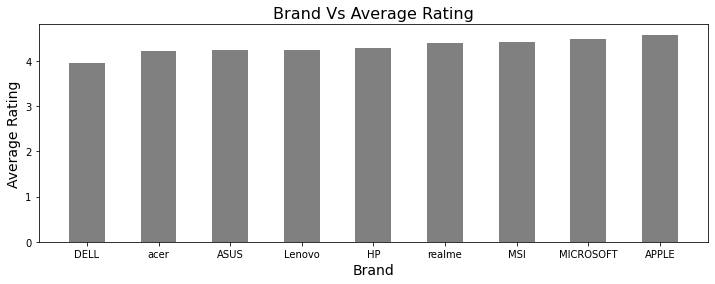

In [18]:
#Arrange the bars ascendingly according to the Average rating 
br_df= br_df.sort_values('Average rating')

#plot a bar chart of each brand Vs average rating using the dataset we just created
x= br_df['Brand']
y= br_df['Average rating']

plt.figure(figsize=(12,4)) #chart size
plt.bar(x, y, width=0.50, color= 'grey') #width refers to the bars width
plt.title('Brand Vs Average Rating', fontsize= 16)
plt.xlabel('Brand', fontsize= 14)
plt.ylabel('Average Rating', fontsize= 14)
plt.show()

#### You can see from the graph that Dell laptops have the lowest rating on average (3.9), while the highest rating goes to Apple laptops (4.58) followed by Microsoft (4.5) and MSI in the third place (4.4).

#### 2. Brand Vs Price

In [37]:
#Calculate the mean(average) price for each brand
laptop_df.groupby('Brand')['Price'].mean()

Brand
APPLE        114525.714286
ASUS          49748.965517
DELL          46808.150000
HP            54680.235294
Lenovo        49645.107143
MICROSOFT     91949.000000
MSI           63873.333333
acer          62065.000000
realme        46940.000000
Name: Price, dtype: float64

In [38]:
#Create a new dataframe with 2 columns: Brand & Average price
bp_data= [['APPLE' , 114525],
          ['ASUS', 49748],
          ['DELL', 46808],
          ['HP',   54680],
          ['Lenovo', 49645],
          ['MICROSOFT', 91949],
          ['MSI', 63873],
          ['acer', 62065],
          ['realme', 46940]]
bp_df= pd.DataFrame(bp_data, columns= ['Brand', 'Average price'])
bp_df.sort_values('Average price')

,Brand,Average price
2,DELL,46808
8,realme,46940
4,Lenovo,49645
1,ASUS,49748
3,HP,54680
7,acer,62065
6,MSI,63873
5,MICROSOFT,91949
0,APPLE,114525


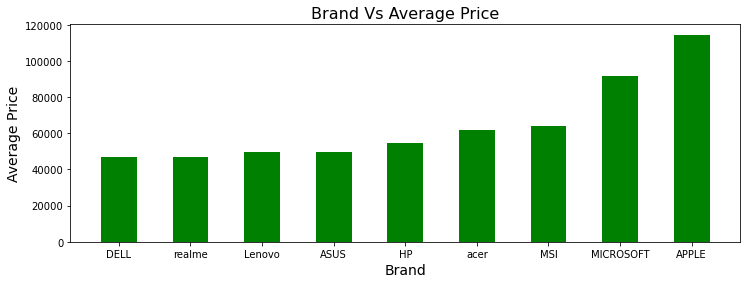

In [39]:
#Arrange the bars ascendingly according to the Average price 
bp_df= bp_df.sort_values('Average price')

#plot a bar chart of each brand Vs average price using the dataset we just created
x= bp_df['Brand']
y= bp_df['Average price']

plt.figure(figsize=(12,4)) 
plt.bar(x, y, width=0.50, color= 'green')
plt.title('Brand Vs Average Price', fontsize= 16)
plt.xlabel('Brand', fontsize= 14)
plt.ylabel('Average Price', fontsize= 14)
plt.show()

#### The brand with the highest average price is Apple (114525), followed by Microsoft (91949), then in the third position comes MSI with an average price of 63873. If you notice, this is the same order of the previous bar chart, meaning that the rating is positively correlating with the price, so the higher the rating, the higher the price.


#### 3. Rating Vs Price

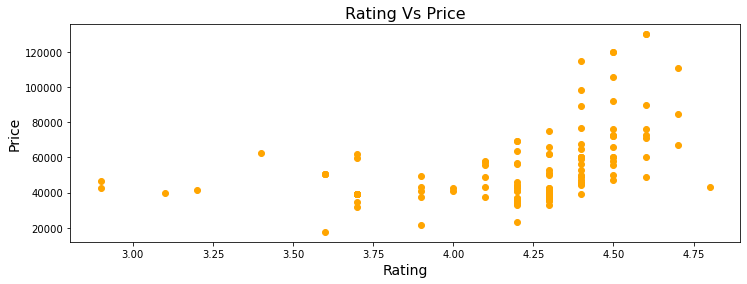

In [40]:
x= laptop_df['Rating']
y= laptop_df['Price']

plt.figure(figsize=(12,4))
plt.scatter(x, y, color= 'orange')
plt.title('Rating Vs Price', fontsize= 16)
plt.xlabel('Rating', fontsize= 14)
plt.ylabel('Price', fontsize= 14)
plt.show()

#### Although the correlation is not quite clear, but you can see from the scatter plot that higher ratings are associated with higher prices. Which confirms the findings of the first and second charts.

#### 4. Model Vs Rating

In [41]:
#Calculate the mean(average) rating for each model
laptop_df.groupby('Model')['Rating'].mean()

Model
15q           4.200000
2020          4.650000
250-G6        4.200000
3000          4.200000
APU           3.900000
ASUS          4.500000
Aspire        4.400000
Book          4.400000
Chromebook    3.900000
Envy          4.300000
GF63          4.500000
HP            4.450000
IdeaPad       4.304545
Inspiron      4.015385
Katana        4.400000
MacBook       4.500000
Nitro         4.500000
Notebook      3.900000
Pavilion      4.466667
ROG           4.600000
Ryzen         4.380000
Surface       4.500000
Swift         4.600000
TUF           4.550000
Thinkpad      4.100000
Travelmate    3.400000
VivoBook      4.176471
Vostro        3.910000
ZenBook       4.400000
v15           3.100000
Name: Rating, dtype: float64

In [42]:
#Create a new dataframe with 2 columns: Model & Average rating
mr_data= [['15q', 4.200000], ['2020', 4.650000], ['250-G6', 4.200000],['3000', 4.200000],['APU', 3.900000],['ASUS', 4.500000],
['Aspire', 4.400000], ['Book', 4.400000], ['Chromebook', 3.900000],['Envy', 4.300000],['GF63', 4.500000],['HP', 4.450000],
['IdeaPad', 4.304545],['Inspiron', 4.015385],['Katana', 4.400000],['MacBook', 4.500000],['Nitro', 4.500000],['Notebook', 3.900000],
['Pavilion', 4.466667],['ROG', 4.600000],['Ryzen', 4.380000],['Surface', 4.500000],['Swift', 4.600000],['TUF', 4.550000],
['Thinkpad', 4.100000],['Travelmate', 3.400000],['VivoBook', 4.176471],['Vostro', 3.910000],['ZenBook',4.400000],['v15', 3.100000]]

mr_df= pd.DataFrame(mr_data, columns= ['Model', 'Average rating'])
mr_df.sort_values('Average rating')

,Model,Average rating
29,v15,3.100000
25,Travelmate,3.400000
4,APU,3.900000
17,Notebook,3.900000
8,Chromebook,3.900000
27,Vostro,3.910000
13,Inspiron,4.015385
24,Thinkpad,4.100000
26,VivoBook,4.176471
0,15q,4.200000


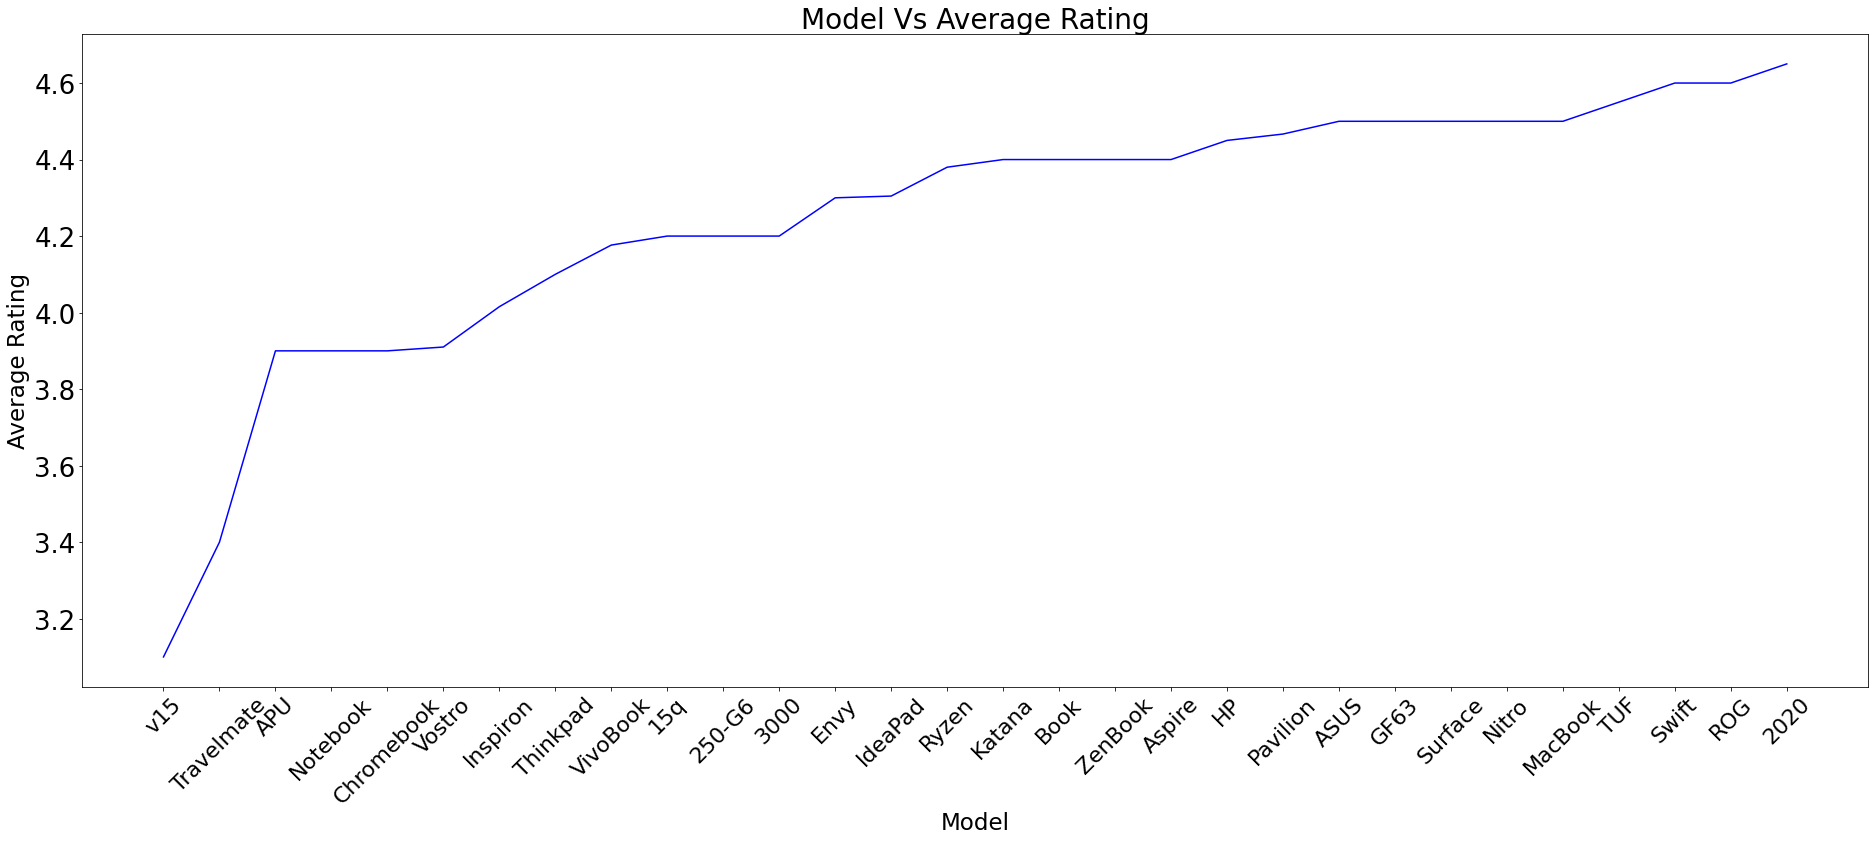

In [43]:
#Arrange the bars ascendingly according to the Average rating
mr_df= mr_df.sort_values('Average rating')

#plot a bar chart of each brand Vs average price using the dataset we just created
x= mr_df['Model']
y= mr_df['Average rating']

plt.figure(figsize=(32,12)) #chart size
plt.plot(x, y, color= 'blue')
plt.title('Model Vs Average Rating', fontsize= 28)
plt.xlabel('Model', fontsize= 23)
plt.xticks(fontsize=22)
plt.yticks(fontsize= 26)
plt.xticks(rotation= 45)
plt.ylabel('Average Rating', fontsize= 23)
plt.show()

#### Laptop with models 2020, ROG, Swift, and TUF got the highest average ratings (4.65, 4.6, 4.6, 4.55 respectively). while v15 and Travelmate had the lowest ratings on average (3.1 and 3.4 respectively)

#### 5. Model Vs Price

In [44]:
#Calculate the mean(average) price for each model
laptop_df.groupby('Model')['Price'].mean()

Model
15q            32905.000000
2020          113965.000000
250-G6         46150.000000
3000           43850.000000
APU            21846.000000
ASUS           71940.000000
Aspire         52940.000000
Book           46940.000000
Chromebook     20565.000000
Envy           74940.000000
GF63           65940.000000
HP             65940.000000
IdeaPad        50436.727273
Inspiron       46033.461538
Katana         76940.000000
MacBook       115273.333333
Nitro          72940.000000
Notebook       40940.000000
Pavilion       78006.666667
ROG            74440.000000
Ryzen          43300.000000
Surface        91949.000000
Swift          59940.000000
TUF            73940.000000
Thinkpad       57440.000000
Travelmate     62440.000000
VivoBook       44628.823529
Vostro         45448.600000
ZenBook       114940.000000
v15            39949.000000
Name: Price, dtype: float64

In [45]:
#Create a new dataframe with 2 columns: Model & Average price
mp_data= [['15q', 32905], ['2020', 113965], ['250-G6', 46150],['3000', 43850],['APU', 21846],['ASUS', 71940],
['Aspire', 52940], ['Book', 46940], ['Chromebook', 20565],['Envy', 74940],['GF63', 65940],['HP', 65940],
['IdeaPad', 50436],['Inspiron', 46033],['Katana', 76940],['MacBook', 115273],['Nitro', 72940],['Notebook', 40940],
['Pavilion', 78006],['ROG', 74440],['Ryzen', 43300],['Surface', 91949],['Swift', 59940],['TUF', 73940],
['Thinkpad', 57440],['Travelmate', 62440],['VivoBook', 44628],['Vostro', 45448],['ZenBook',114940],['v15', 39949]]

mp_df= pd.DataFrame(mp_data, columns= ['Model', 'Average price'])
mp_df.sort_values('Average price')

,Model,Average price
8,Chromebook,20565
4,APU,21846
0,15q,32905
29,v15,39949
17,Notebook,40940
20,Ryzen,43300
3,3000,43850
26,VivoBook,44628
27,Vostro,45448
13,Inspiron,46033


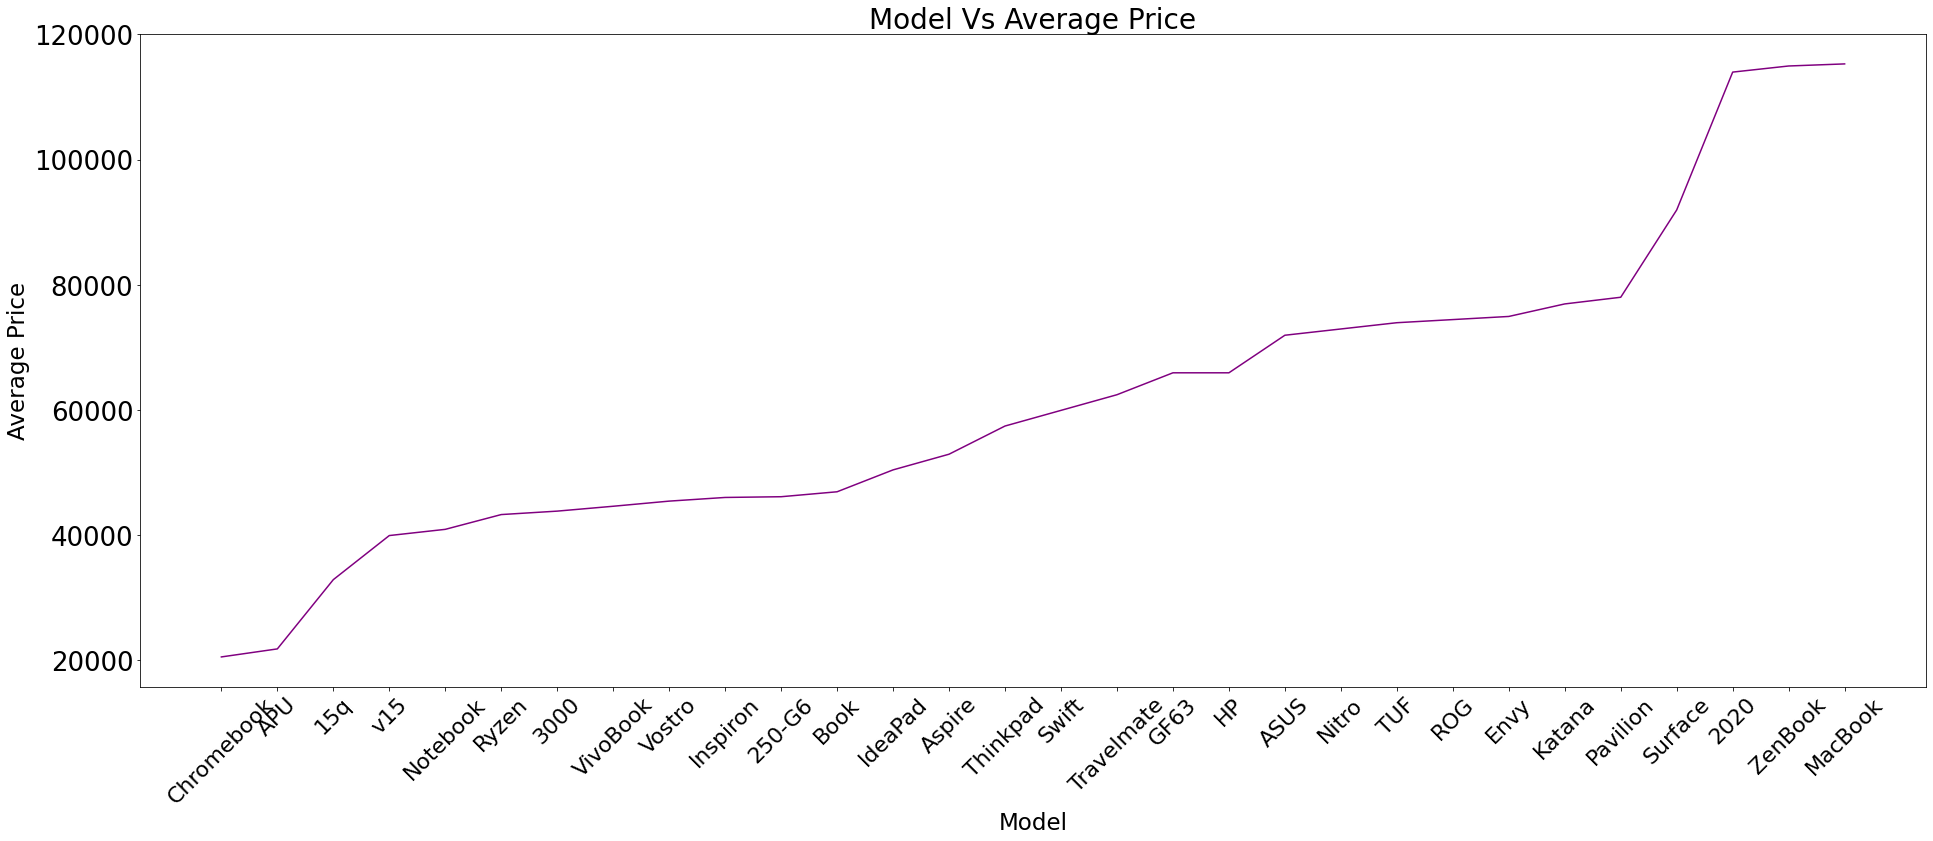

In [46]:
#Arrange the bars ascendingly according to the Average price
mp_df= mp_df.sort_values('Average price')

#plot a bar chart of each model Vs average price using the dataset we just created
x= mp_df['Model']
y= mp_df['Average price']

plt.figure(figsize=(32,12)) #chart size
plt.plot(x, y, color= 'purple')
plt.title('Model Vs Average Price', fontsize= 28)
plt.xlabel('Model', fontsize= 23)
plt.xticks(fontsize=22)
plt.yticks(fontsize= 26)
plt.xticks(rotation= 45)
plt.ylabel('Average Price', fontsize= 23)
plt.show()

#### Models with the highest average prices are MacBook, ZenBook, and 2020 (115273, 114940, 113965 respectively). While Chromebook and APU are considered to be the cheapest of all models with average prices of 20565 and 21846.


#### 6. Processor Vs Price

In [47]:
#Calculate the mean(average) price for each processor type
laptop_df.groupby('Processor')['Price'].mean()

Processor
-           31590.000000
3050U       33940.000000
3250U       37406.666667
3450U       47873.333333
4600H       59940.000000
4800H       75940.000000
4800HS      72940.000000
5300U       42740.000000
5500U       49940.000000
5600H       64440.000000
5600U       57440.000000
A9          21846.000000
AMD         59850.000000
R3-3250U    37340.000000
i3          41611.206897
i5          64557.388889
i7          76740.000000
Name: Price, dtype: float64

In [48]:
#Create a new dataframe with 2 columns: Processor type & Average price
pp_data= [['3050U', 33940.000000],['3250U', 37406.666667],['3450U', 47873.333333],['4600H', 59940.000000],
['4800H', 75940.000000],['4800HS', 72940.000000],['5300U', 42740.000000],['5500U', 49940.000000],['5600H', 64440.000000],
['5600U', 57440.000000],['A9', 21846.000000],['AMD', 59850.000000],['R3-3250U', 37340.000000],['i3', 41611.206897],
['i5', 64557.388889],['i7', 76740.000000]]

pp_df= pd.DataFrame(pp_data, columns= ['Processor', 'Average price'])
pp_df.sort_values('Average price')

,Processor,Average price
10,A9,21846.000000
0,3050U,33940.000000
12,R3-3250U,37340.000000
1,3250U,37406.666667
13,i3,41611.206897
6,5300U,42740.000000
2,3450U,47873.333333
7,5500U,49940.000000
9,5600U,57440.000000
11,AMD,59850.000000


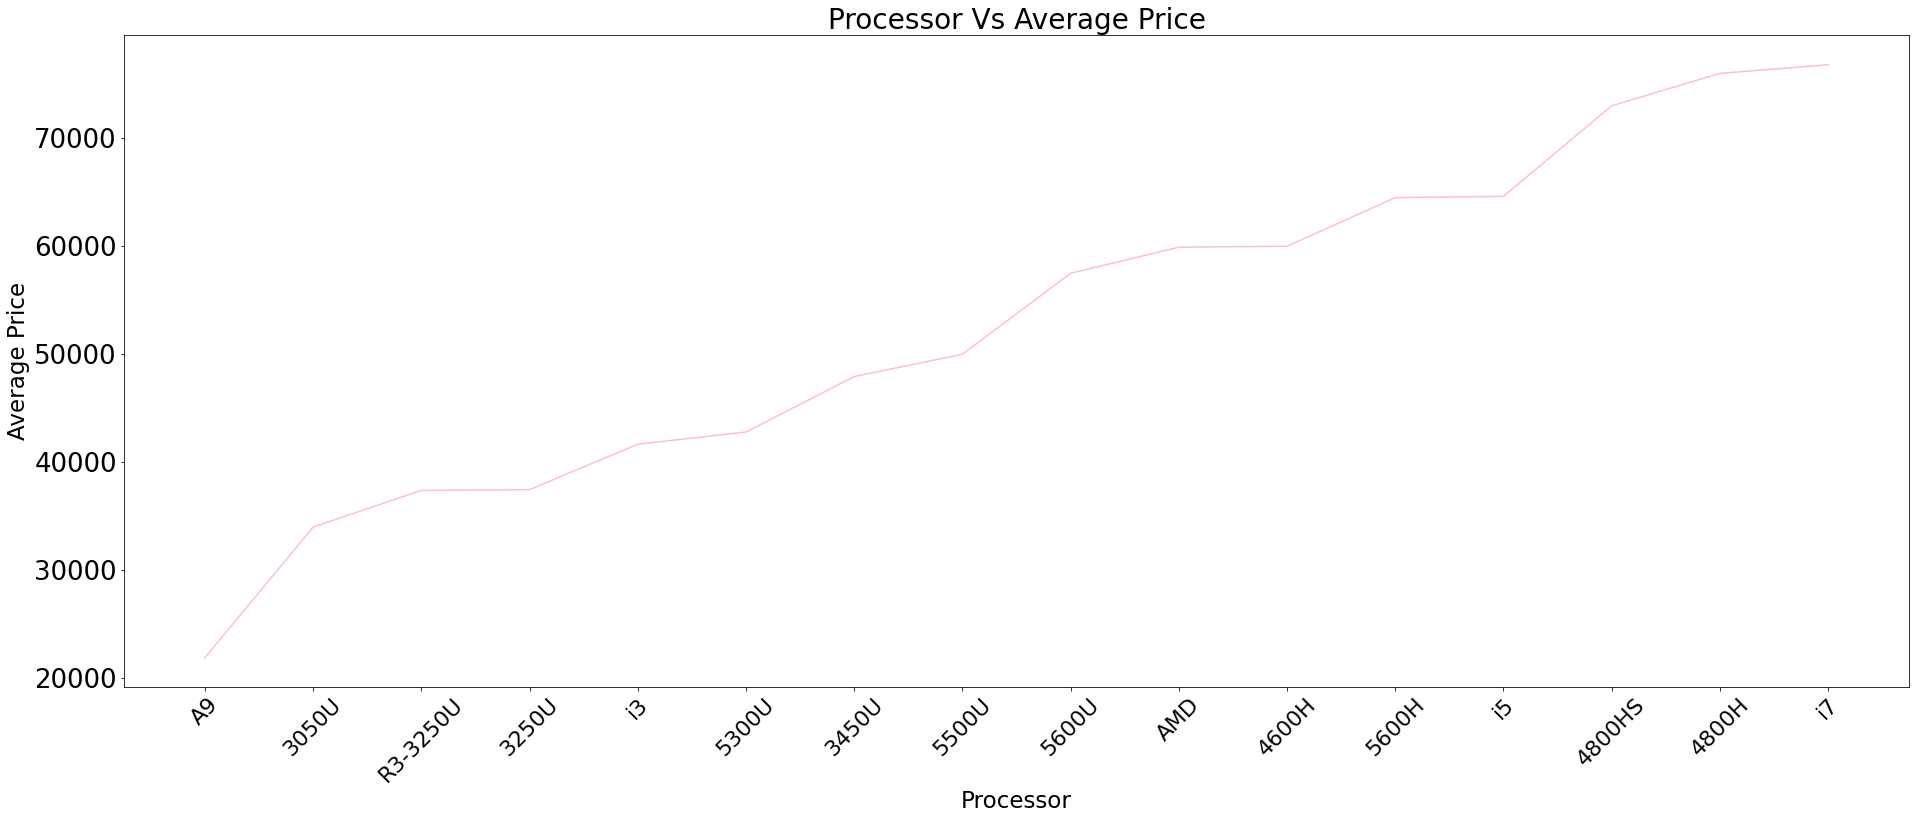

In [49]:
#Arrange the bars ascendingly according to the Average price
pp_df= pp_df.sort_values('Average price')

#plot a bar chart of each Processor type Vs average price using the dataset we just created
x= pp_df['Processor']
y= pp_df['Average price']

plt.figure(figsize=(32,12)) #chart size
plt.plot(x, y, color= 'pink')
plt.title('Processor Vs Average Price', fontsize= 28)
plt.xlabel('Processor', fontsize= 23)
plt.xticks(fontsize=22)
plt.yticks(fontsize= 26)
plt.xticks(rotation= 45)
plt.ylabel('Average Price', fontsize= 23)
plt.show()

#### Core i7, 4800H, and 4800HS processors cost on average the most of all processor types. While Apple A9 processor is the cheapest on average (21846).

#### 7. RAM Vs Price

In [50]:
#Calculate the mean(average) price for each RAM size
laptop_df.groupby('RAM')['Price'].mean()

RAM
4.0     33808.400000
8.0     48914.400000
16.0    74510.588235
Name: Price, dtype: float64

In [51]:
#Create a new dataframe with 2 columns: RAM size & Average price
rp_data= [['4.0', 33808], ['8.0', 48914], ['16.0', 74510]]
rp_df= pd.DataFrame(rp_data, columns= ['RAM', 'Average price'])
rp_df.sort_values('Average price')

,RAM,Average price
0,4.0,33808
1,8.0,48914
2,16.0,74510


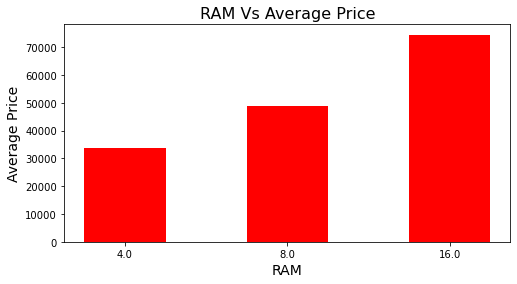

In [52]:
#plot a bar chart of each RAM size Vs average price using the dataset we just created
x= rp_df['RAM']
y= rp_df['Average price']

plt.figure(figsize=(8,4)) #chart size
plt.bar(x, y, width= 0.5, color= 'red')
plt.title('RAM Vs Average Price', fontsize= 16)
plt.xlabel('RAM', fontsize= 14)
plt.ylabel('Average Price', fontsize= 14)
plt.show()

#### As expected, as the RAM size increases, the price increases. And this is quite resonable, because the higher the RAM, the better the performance.

#### 8- Hard disk capacity Vs Price

In [21]:
#Calculate the mean(average) price for each Hard disk size
laptop_df.groupby('Hard_Disk_Capacity')['Price'].mean()

Hard_Disk_Capacity
1 TB HDD              46219.44186
1 TB SSD              72940.00000
128 GB SSD            91949.00000
256 GB SSD            39408.00000
32 GB EMMC Storage    17640.00000
512 GB SSD            59948.94000
64 GB EMMC Storage    23490.00000
Name: Price, dtype: float64

In [22]:
#Create a new dataframe with 2 columns: Hard disk size & Average price
hp_data= [['1 TB HDD', 46219.44186],
['1 TB SSD', 72940.00000],
['128 GB SSD', 91949.00000],
['256 GB SSD',  39408.00000],
['32 GB EMMC Storage', 17640.00000],
['512 GB SSD', 59948.94000],
['64 GB EMMC Storage', 23490.00000]]

hp_df= pd.DataFrame(hp_data, columns= ['Hard disk capacity', 'Average price'])
hp_df.sort_values('Average price')

,Hard disk capacity,Average price
4,32 GB EMMC Storage,17640.00000
6,64 GB EMMC Storage,23490.00000
3,256 GB SSD,39408.00000
0,1 TB HDD,46219.44186
5,512 GB SSD,59948.94000
1,1 TB SSD,72940.00000
2,128 GB SSD,91949.00000


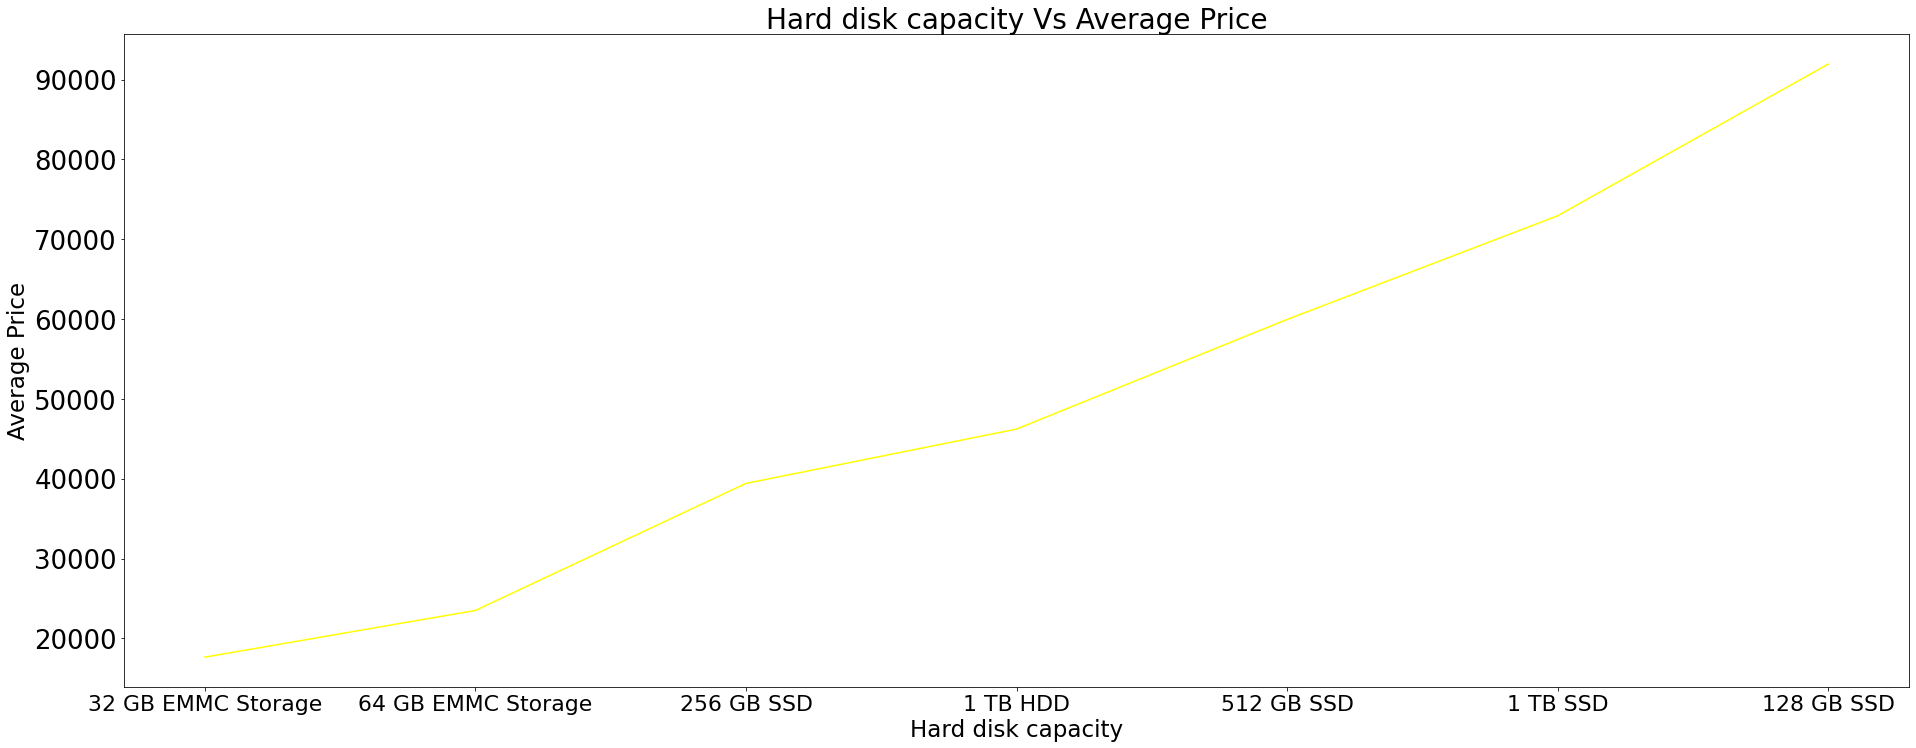

In [26]:
#Arrange the bars ascendingly according to the Average price
hp_df= hp_df.sort_values('Average price')

#plot a bar chart of each hard disk size Vs average price using the dataset we just created
x= hp_df['Hard disk capacity']
y= hp_df['Average price']

plt.figure(figsize=(32,12)) #chart size
plt.plot(x, y, color= 'yellow')
plt.title('Hard disk capacity Vs Average Price', fontsize= 28)
plt.xlabel('Hard disk capacity', fontsize= 23)
plt.xticks(fontsize=22)
plt.yticks(fontsize= 26)
plt.ylabel('Average Price', fontsize= 23)
plt.show()

#### It looks obvious that laptops with a hard disk size of 128 GB Solid State Drive are the most expensive (91949). It doesn't really make sense that a laptop with a 1 TB SSD is cheaper than one with an SSD of 128 GB. But if you remember, we're taking the average price for each hard disk type, which means that a laptop with an SSD of 128 GB might have other high specs than that of a 1 TB. Or simply, it could be an Apple laptop so it costs more!

### Conclusions

#### 1- The dataset has 130 records and 11 columns representing 11 different features.
#### 2- Values in RAM & Operating system are float (decimal numbers), Price values are in integer form, and the other features are in string format.
#### 3- The lowest RAM a laptop has in this dataset is 4GB, while the highest has 16 GB.
#### 4- The mean (average) price for a laptop is 53962, the cheapest laptop costs 17640 while the most expensive one costs 129990.
#### 5- The lowest rating for a laptop is 2.9, while the highest one is 4.8
#### 6- Dell laptops have the lowest rating on average (3.9), while the highest average rating goes to Apple laptops (4.58) followed by Microsoft (4.5) and MSI in the third place (4.4).
#### 7- Higher ratings are sometimes associated with higher prices.
#### 8- Laptop with models 2020, ROG, Swift, and TUF got the highest average ratings, while v15 and Travelmate had the lowest ratings on average (3.1 and 3.4 respectively).
#### 9- Models with the highest average prices are MacBook, ZenBook, and 2020 (115273, 114940, 113965 respectively). While Chromebook and APU are considered to be the cheapest of all models with average prices of 20565 and 21846 respectively.
#### 10- Core i7, 4800H, and 4800HS processors cost the most of all processor types. While Apple A9 processor is the cheapest on average.
#### 11- As the RAM size of a laptop increases, the price increases.
#### 12- laptops with a hard disk size of 128 GB SSD are the most expensive on average (91949). While laptops with 32 GB EMMC storage cost the least (17640).
